In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\mgang\Downloads\news.csv")
og_df=df

In [4]:
df=df.drop(columns= 'url')

In [5]:
#encoding for weekday and data_channel columns, changing categorical variables into boolean (1 and 0)
df=df.drop(columns=[ ' data_channel_is_lifestyle', 'weekday'])

df=df.astype(int)

df.dtypes

timedelta                       int32
n_tokens_title                  int32
n_tokens_content                int32
n_unique_tokens                 int32
n_non_stop_words                int32
n_non_stop_unique_tokens        int32
num_hrefs                       int32
num_self_hrefs                  int32
num_imgs                        int32
num_videos                      int32
average_token_length            int32
num_keywords                    int32
kw_min_min                      int32
kw_max_min                      int32
kw_avg_min                      int32
kw_min_max                      int32
kw_max_max                      int32
kw_avg_max                      int32
kw_min_avg                      int32
kw_max_avg                      int32
kw_avg_avg                      int32
self_reference_min_shares       int32
self_reference_max_shares       int32
self_reference_avg_sharess      int32
is_weekend                      int32
LDA_00                          int32
LDA_01      

In [6]:
target=' shares'
correlations = df.corr()[target].drop(target).sort_values(ascending=False)
print(correlations)

kw_avg_avg                      0.110413
kw_max_avg                      0.064306
self_reference_avg_sharess      0.057789
self_reference_min_shares       0.055958
self_reference_max_shares       0.047115
num_hrefs                       0.045404
kw_avg_max                      0.044686
kw_min_avg                      0.039557
num_imgs                        0.039388
kw_avg_min                      0.030400
kw_max_min                      0.030114
num_videos                      0.023936
num_keywords                    0.021818
max_positive_polarity           0.019468
title_subjectivity              0.019393
is_weekend                      0.016958
abs_title_sentiment_polarity    0.015997
title_sentiment_polarity        0.014712
n_tokens_title                  0.008783
timedelta                       0.008662
kw_max_max                      0.007863
kw_min_max                      0.003901
n_tokens_content                0.002459
n_non_stop_words                0.001211
avg_negative_pol

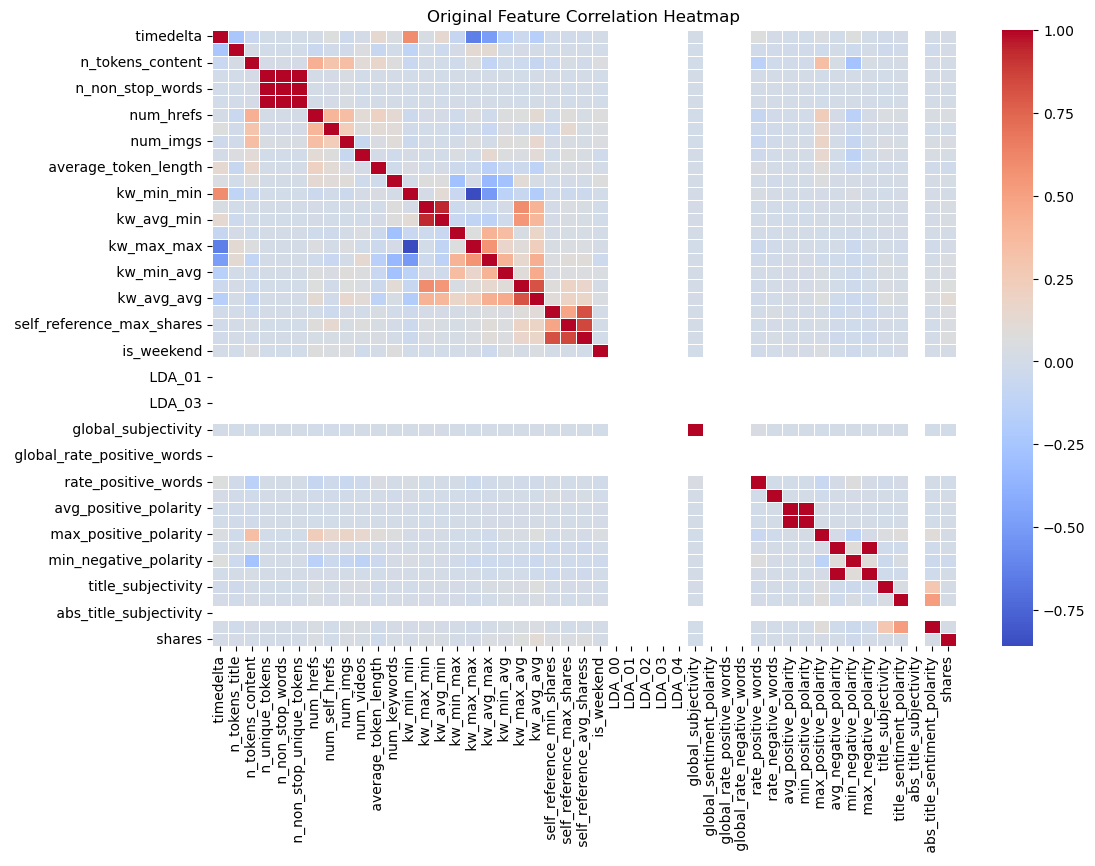

In [7]:
correlation_matrix_og = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_og, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Original Feature Correlation Heatmap")
plt.show()

In [8]:
#dropping LDA columns, subjective measurement on how close each is to the Data_channel_is_lifestyle column topics, hard to interpret in model
df=df.drop(columns=[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04'])

#dropping all min and max measurement for shares, polarity, only keeping average as a general rule
df=df.drop(columns=[' self_reference_min_shares', ' self_reference_max_shares', ' min_positive_polarity', ' max_positive_polarity', ' min_negative_polarity', ' max_negative_polarity' ])
#dropping global rate for pos and neg words, since global rate is among all words, variance is low and will have little effect on model
df=df.drop(columns=[' global_rate_positive_words', ' global_rate_negative_words', ' global_subjectivity', ' global_sentiment_polarity'])


In [9]:
correlation_matrix = df.corr()

#printing the correlations 
collinear_features=[]
for i, column1 in enumerate(correlation_matrix.columns):
    for j, column2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.loc[column1, column2]) > 0.4:
            print(f"The correlation between {column1} and {column2} is: {correlation_matrix.loc[column1, column2]:.4f}")
            if column1 not in collinear_features:
                collinear_features.append(column1)
            if column2 not in collinear_features:
                collinear_features.append(column2)

The correlation between  timedelta and  kw_min_min is: 0.5912
The correlation between  timedelta and  kw_max_max is: -0.6378
The correlation between  timedelta and  kw_avg_max is: -0.4931
The correlation between  n_tokens_content and  num_hrefs is: 0.4231
The correlation between  n_unique_tokens and  n_non_stop_words is: 1.0000
The correlation between  n_unique_tokens and  n_non_stop_unique_tokens is: 1.0000
The correlation between  n_non_stop_words and  n_non_stop_unique_tokens is: 1.0000
The correlation between  kw_min_min and  kw_max_max is: -0.8572
The correlation between  kw_min_min and  kw_avg_max is: -0.5027
The correlation between  kw_max_min and  kw_avg_min is: 0.9405
The correlation between  kw_max_min and  kw_max_avg is: 0.5905
The correlation between  kw_max_min and  kw_avg_avg is: 0.4113
The correlation between  kw_avg_min and  kw_max_avg is: 0.5457
The correlation between  kw_min_max and  kw_avg_max is: 0.4115
The correlation between  kw_max_max and  kw_avg_max is: 0.5634

In [10]:
#since all these columns have high correlations with each other, we will look at each individual columns correlation with target (shares)
target=' shares'
correlations = df[collinear_features + [target]].corr()[target].drop(target).sort_values(ascending=False)
    

In [11]:
print(correlations)

kw_avg_avg                      0.110413
kw_max_avg                      0.064306
num_hrefs                       0.045404
kw_avg_max                      0.044686
kw_min_avg                      0.039557
kw_avg_min                      0.030400
kw_max_min                      0.030114
abs_title_sentiment_polarity    0.015997
title_sentiment_polarity        0.014712
timedelta                       0.008662
kw_max_max                      0.007863
kw_min_max                      0.003901
n_tokens_content                0.002459
n_non_stop_words                0.001211
n_non_stop_unique_tokens        0.001082
n_unique_tokens                 0.001082
kw_min_min                     -0.001051
Name:  shares, dtype: float64


In [12]:
kw_features= [col for col in df.columns if col.startswith(' kw')]
kw_df=df[kw_features]

kw_correlation_matrix = kw_df.corr()

#printing the correlations 
kw_features=[]
for i, column1 in enumerate(kw_correlation_matrix.columns):
    for j, column2 in enumerate(kw_correlation_matrix.columns):
        if i < j and abs(kw_correlation_matrix.loc[column1, column2]) > 0.5:
            print(f"The correlation between {column1} and {column2} is: {kw_correlation_matrix.loc[column1, column2]:.4f}")
            if column1 not in kw_features:
                kw_features.append(column1)
            if column2 not in kw_features:
                kw_features.append(column2)



The correlation between  kw_min_min and  kw_max_max is: -0.8572
The correlation between  kw_min_min and  kw_avg_max is: -0.5027
The correlation between  kw_max_min and  kw_avg_min is: 0.9405
The correlation between  kw_max_min and  kw_max_avg is: 0.5905
The correlation between  kw_avg_min and  kw_max_avg is: 0.5457
The correlation between  kw_max_max and  kw_avg_max is: 0.5634
The correlation between  kw_max_avg and  kw_avg_avg is: 0.8119


In [13]:
kw_correlations_w_shares = df[kw_features + [target]].corr()[target].drop(target).sort_values(ascending=False)
print(kw_correlations_w_shares)

kw_avg_avg    0.110413
kw_max_avg    0.064306
kw_avg_max    0.044686
kw_avg_min    0.030400
kw_max_min    0.030114
kw_max_max    0.007863
kw_min_min   -0.001051
Name:  shares, dtype: float64


In [14]:
#keeping only kw_avg avg min max, as a rule only keeping averages
df=df.drop(columns=[' kw_min_avg', ' kw_max_avg',' kw_max_min', ' kw_min_max', ' kw_max_max', ' kw_min_min' ])

In [15]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,is_weekend,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,725,10,331,0,0,0,18,5,1,0,...,1,0,0,0,0,0,0,0,0,731
1,725,10,497,0,0,0,14,3,9,0,...,1,0,0,0,0,0,0,0,0,1900
2,725,16,83,0,0,0,5,3,1,0,...,1,0,0,0,0,0,0,0,0,2100
3,725,6,279,0,0,0,4,3,1,10,...,1,0,0,0,0,1,0,0,0,1400
4,725,9,180,0,0,0,16,3,7,0,...,1,0,0,0,0,0,0,0,0,3700


In [16]:
df.dtypes

timedelta                       int32
n_tokens_title                  int32
n_tokens_content                int32
n_unique_tokens                 int32
n_non_stop_words                int32
n_non_stop_unique_tokens        int32
num_hrefs                       int32
num_self_hrefs                  int32
num_imgs                        int32
num_videos                      int32
average_token_length            int32
num_keywords                    int32
kw_avg_min                      int32
kw_avg_max                      int32
kw_avg_avg                      int32
self_reference_avg_sharess      int32
is_weekend                      int32
rate_positive_words             int32
rate_negative_words             int32
avg_positive_polarity           int32
avg_negative_polarity           int32
title_subjectivity              int32
title_sentiment_polarity        int32
abs_title_subjectivity          int32
abs_title_sentiment_polarity    int32
shares                          int32
dtype: objec

In [17]:
correlation_matrix = df.corr()

#printing the correlations 
collinear_features=[]
for i, column1 in enumerate(correlation_matrix.columns):
    for j, column2 in enumerate(correlation_matrix.columns):
        if i < j and abs(correlation_matrix.loc[column1, column2]) > 0.6:
            print(f"The correlation between {column1} and {column2} is: {correlation_matrix.loc[column1, column2]:.4f}")
            if column1 not in collinear_features:
                collinear_features.append(column1)
            if column2 not in collinear_features:
                collinear_features.append(column2)

The correlation between  n_unique_tokens and  n_non_stop_words is: 1.0000
The correlation between  n_unique_tokens and  n_non_stop_unique_tokens is: 1.0000
The correlation between  n_non_stop_words and  n_non_stop_unique_tokens is: 1.0000


In [18]:
print(df[' n_unique_tokens'].var())
print(df[' n_non_stop_words'].var())
print(df[' n_non_stop_unique_tokens'].var())

12.395343557655874
27.38949789049885
10.65735041872795


In [19]:
#all three are highly correlated, keeping n_non_stop_words bc it has highest variance

df=df.drop(columns=[' n_unique_tokens', ' n_non_stop_unique_tokens'])


In [20]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_words,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,is_weekend,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,725,10,331,0,18,5,1,0,5,10,...,1,0,0,0,0,0,0,0,0,731
1,725,10,497,0,14,3,9,0,4,6,...,1,0,0,0,0,0,0,0,0,1900
2,725,16,83,0,5,3,1,0,4,10,...,1,0,0,0,0,0,0,0,0,2100
3,725,6,279,0,4,3,1,10,4,10,...,1,0,0,0,0,1,0,0,0,1400
4,725,9,180,0,16,3,7,0,4,6,...,1,0,0,0,0,0,0,0,0,3700


In [21]:
print(correlation_matrix.loc[' title_subjectivity', ' abs_title_subjectivity'])

#drop absolute title sentiment and subjectivity, direction is an important indicator
df=df.drop(columns= [' abs_title_subjectivity', ' abs_title_sentiment_polarity'])

nan


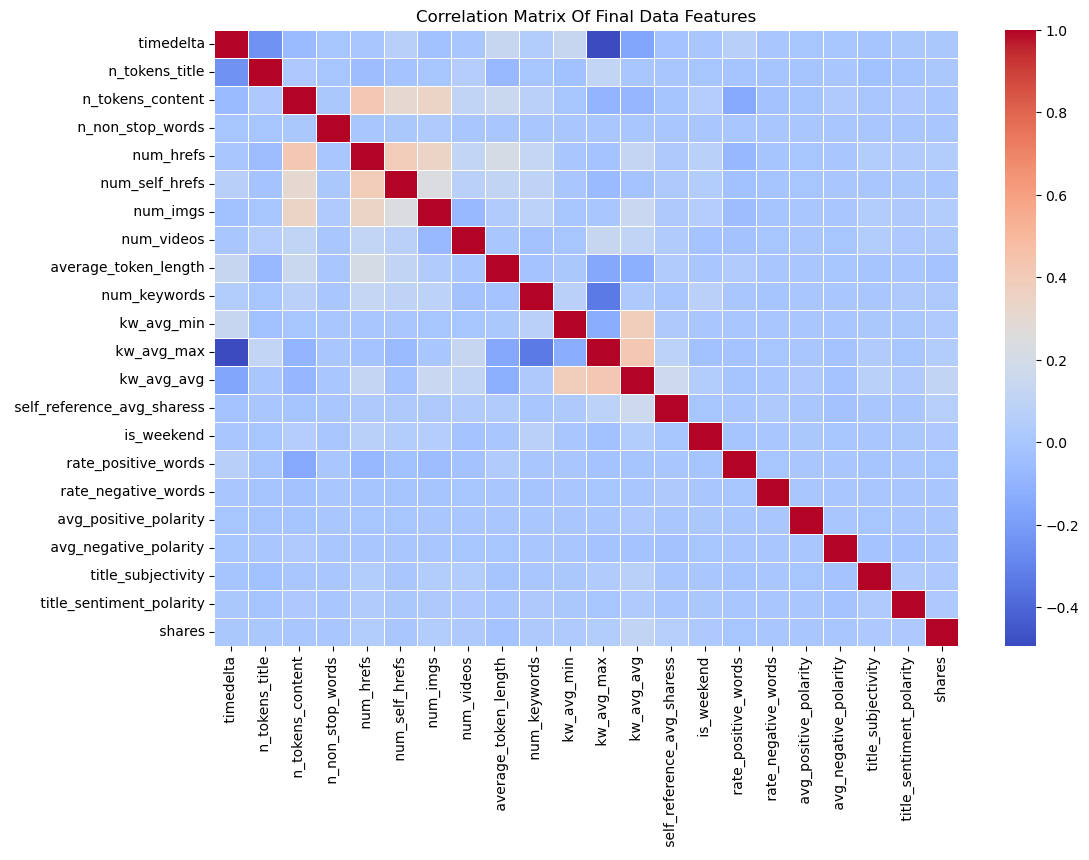

In [22]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Of Final Data Features")
plt.show()


In [23]:
df.drop(columns=[col for col in df.columns if col.startswith("weekday_")], inplace=True)
df.columns = df.columns.str.strip()

In [24]:
df['target'] = (df['shares'] > 1400).astype(int)
df.drop(columns='shares', inplace=True)
df['target'].values

array([0, 1, 1, ..., 0, 1, 0])

Accuracy: 0.632
ROC AUC: 0.689


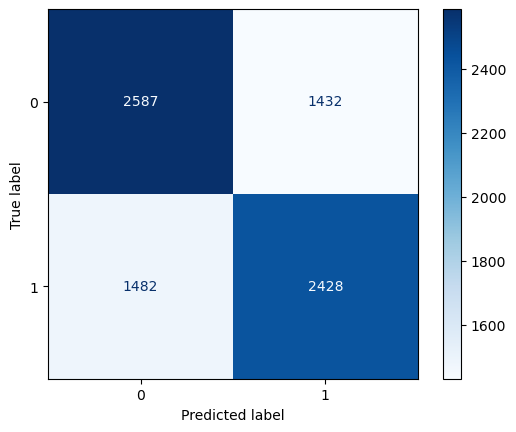

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Define features and target
X = df.drop(columns='target')
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit random forest regression model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

X = df.drop(columns='target')
y = df['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

max_depths=[5, 15]
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    for i in max_depths:
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]

        # Train metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        train_auc = roc_auc_score(y_train, y_train_prob)
        train_prec = precision_score(y_train, y_train_pred)
        train_rec = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)

        # Test metrics
        test_acc = accuracy_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_prob)
        test_prec = precision_score(y_test, y_test_pred)
        test_rec = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        print(f"\nFold {fold} | Max Depth: {i}")
        print(f"  Train Accuracy: {train_acc:.3f} | AUC: {train_auc:.3f} | Precision: {train_prec:.3f} | Recall: {train_rec:.3f} | F1: {train_f1:.3f}")
        print(f"  Test  Accuracy: {test_acc:.3f} | AUC: {test_auc:.3f} | Precision: {test_prec:.3f} | Recall: {test_rec:.3f} | F1: {test_f1:.3f}")

    
    
        



Fold 1 | Max Depth: 5
  Train Accuracy: 0.642 | AUC: 0.698 | Precision: 0.646 | Recall: 0.610 | F1: 0.627
  Test  Accuracy: 0.630 | AUC: 0.685 | Precision: 0.631 | Recall: 0.601 | F1: 0.616

Fold 1 | Max Depth: 15
  Train Accuracy: 0.887 | AUC: 0.954 | Precision: 0.906 | Recall: 0.862 | F1: 0.883
  Test  Accuracy: 0.642 | AUC: 0.700 | Precision: 0.634 | Recall: 0.651 | F1: 0.642

Fold 2 | Max Depth: 5
  Train Accuracy: 0.638 | AUC: 0.695 | Precision: 0.640 | Recall: 0.609 | F1: 0.624
  Test  Accuracy: 0.636 | AUC: 0.687 | Precision: 0.637 | Recall: 0.612 | F1: 0.624

Fold 2 | Max Depth: 15
  Train Accuracy: 0.893 | AUC: 0.957 | Precision: 0.912 | Recall: 0.866 | F1: 0.888
  Test  Accuracy: 0.652 | AUC: 0.709 | Precision: 0.644 | Recall: 0.658 | F1: 0.651

Fold 3 | Max Depth: 5
  Train Accuracy: 0.642 | AUC: 0.697 | Precision: 0.643 | Recall: 0.615 | F1: 0.629
  Test  Accuracy: 0.630 | AUC: 0.686 | Precision: 0.632 | Recall: 0.597 | F1: 0.614

Fold 3 | Max Depth: 15
  Train Accuracy: 0

In [27]:
importances = model.feature_importances_

# Put into DataFrame for readability
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top features
print(feature_importance_df.head(10))


                       Feature  Importance
12                  kw_avg_avg    0.153842
13  self_reference_avg_sharess    0.118904
0                    timedelta    0.102223
11                  kw_avg_max    0.098371
10                  kw_avg_min    0.092233
2             n_tokens_content    0.092184
4                    num_hrefs    0.067001
6                     num_imgs    0.050738
1               n_tokens_title    0.047840
5               num_self_hrefs    0.043260


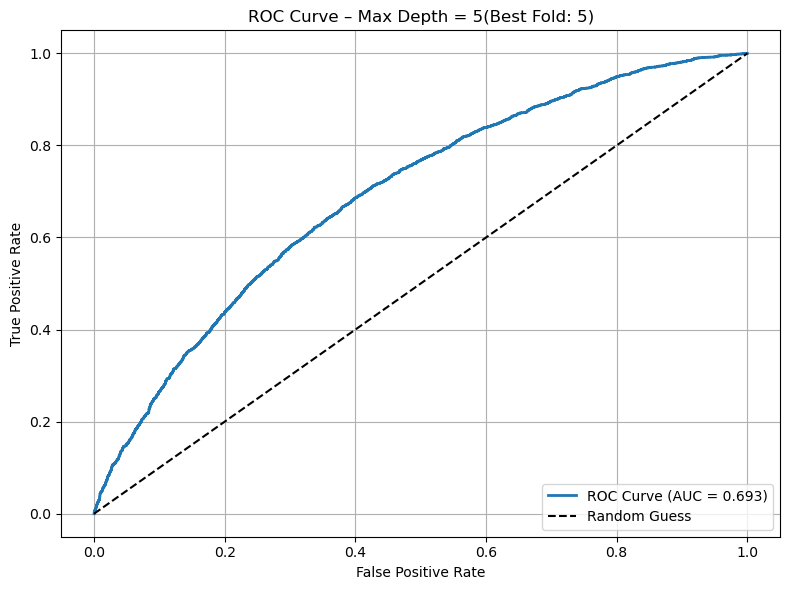

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Data
X = df.drop(columns='target')
y = df['target']

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
max_depth = 5

best_auc = 0
best_fold = None
best_fpr = None
best_tpr = None

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    fold_auc = auc(fpr, tpr)

    if fold_auc > best_auc:
        best_auc = fold_auc
        best_fold = fold
        best_fpr = fpr
        best_tpr = tpr

# Plot the best fold's ROC
plt.figure(figsize=(8, 6))
plt.plot(best_fpr, best_tpr, label=f'ROC Curve (AUC = {best_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve – Max Depth = 5(Best Fold: {best_fold})')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



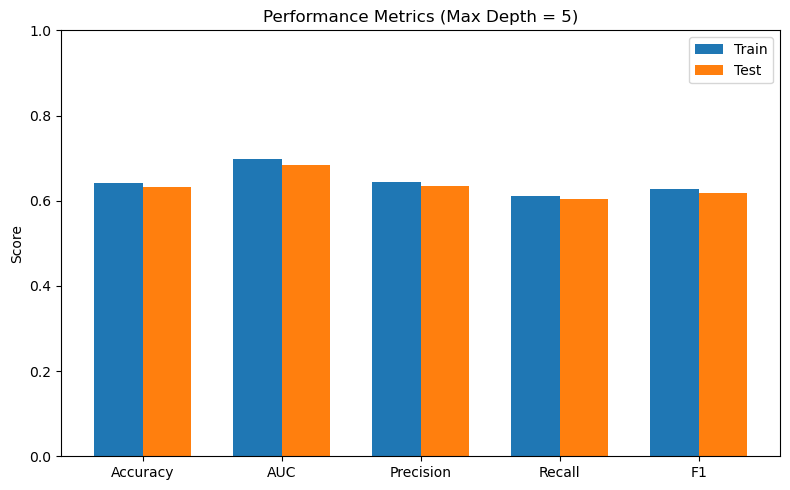

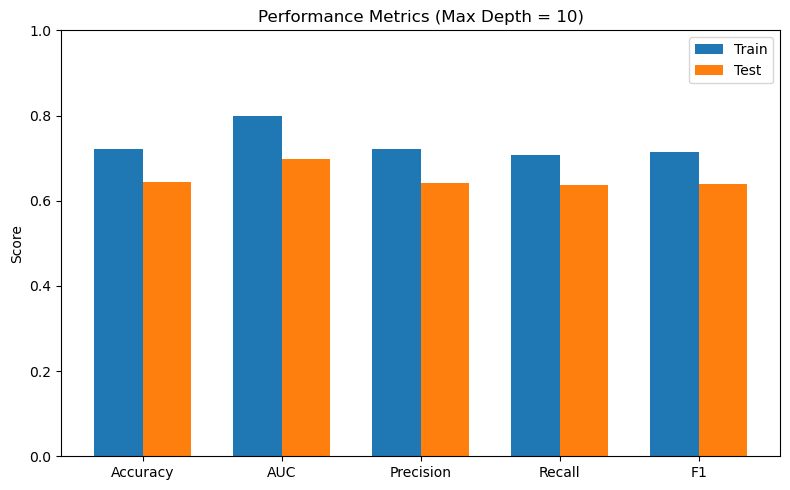

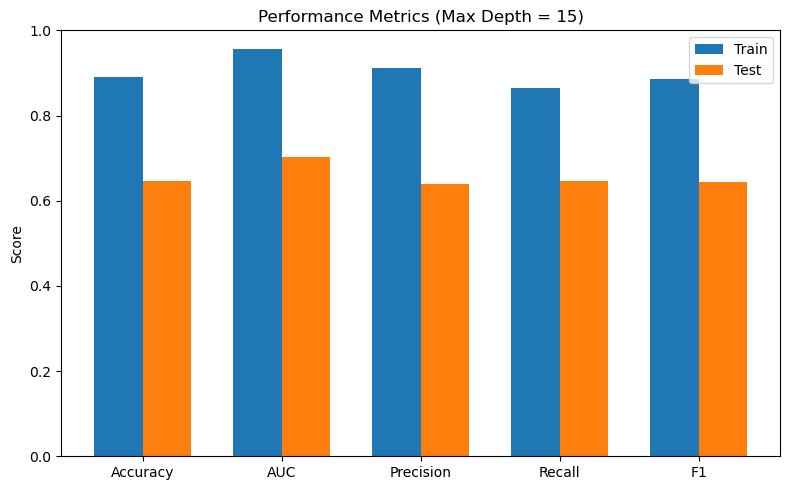

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

X = df.drop(columns='target')
y = df['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
max_depths = [5, 10, 15]
metrics_summary = {depth: {'train': [], 'test': []} for depth in max_depths}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    for depth in max_depths:
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]

        train_metrics = [
            accuracy_score(y_train, y_train_pred),
            roc_auc_score(y_train, y_train_prob),
            precision_score(y_train, y_train_pred),
            recall_score(y_train, y_train_pred),
            f1_score(y_train, y_train_pred)
        ]

        test_metrics = [
            accuracy_score(y_test, y_test_pred),
            roc_auc_score(y_test, y_test_prob),
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            f1_score(y_test, y_test_pred)
        ]

        metrics_summary[depth]['train'].append(train_metrics)
        metrics_summary[depth]['test'].append(test_metrics)

# Plotting
metric_names = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1']

for depth in max_depths:
    train_avg = np.mean(metrics_summary[depth]['train'], axis=0)
    test_avg = np.mean(metrics_summary[depth]['test'], axis=0)

    x = np.arange(len(metric_names))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, train_avg, width, label='Train')
    plt.bar(x + width/2, test_avg, width, label='Test')

    plt.ylabel('Score')
    plt.title(f'Performance Metrics (Max Depth = {depth})')
    plt.xticks(x, metric_names)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()
